#Sprint 4, T01

##Nivell 1

###Execise 1 - Graphic analysis: Unique Carrier

In [111]:
import matplotlib.pyplot as plt, mpld3
from matplotlib.pyplot import figure
from matplotlib import cm
import pandas as pd
import numpy as np
import seaborn as sns

df =  pd.read_csv('DelayedFlights.csv')

####One categoric value - UniqueCarrier

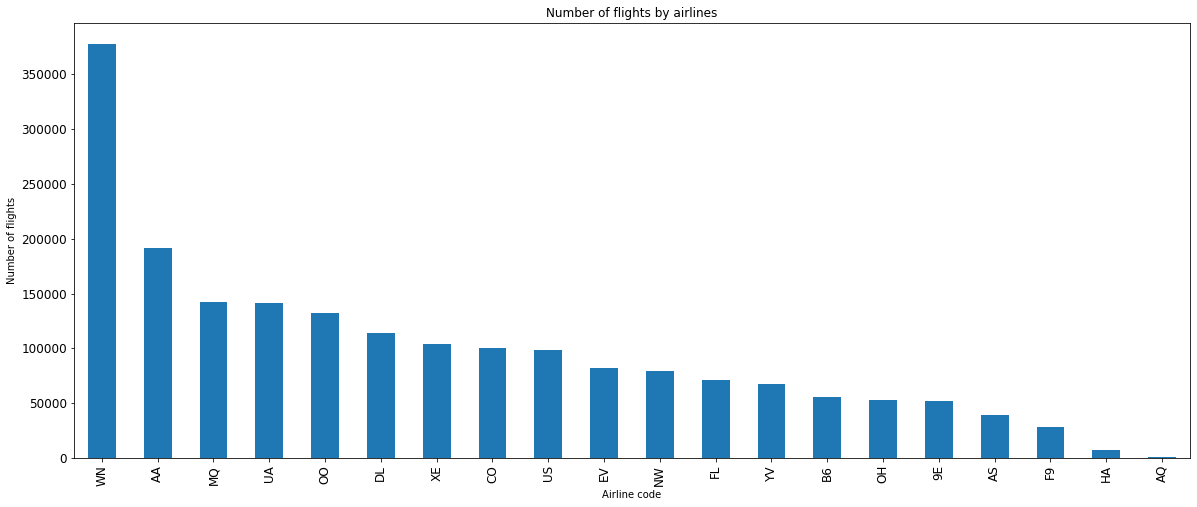

In [144]:
#fisrt option - simple way how to show values from a group
df['UniqueCarrier'].value_counts().plot.bar(figsize=(20, 8), 
                                            fontsize=12, 
                                            title='Number of flights by airlines', 
                                            ylabel='Number of flights',
                                            xlabel='Airline code')
plt.savefig('fig1.png')
plt.show()

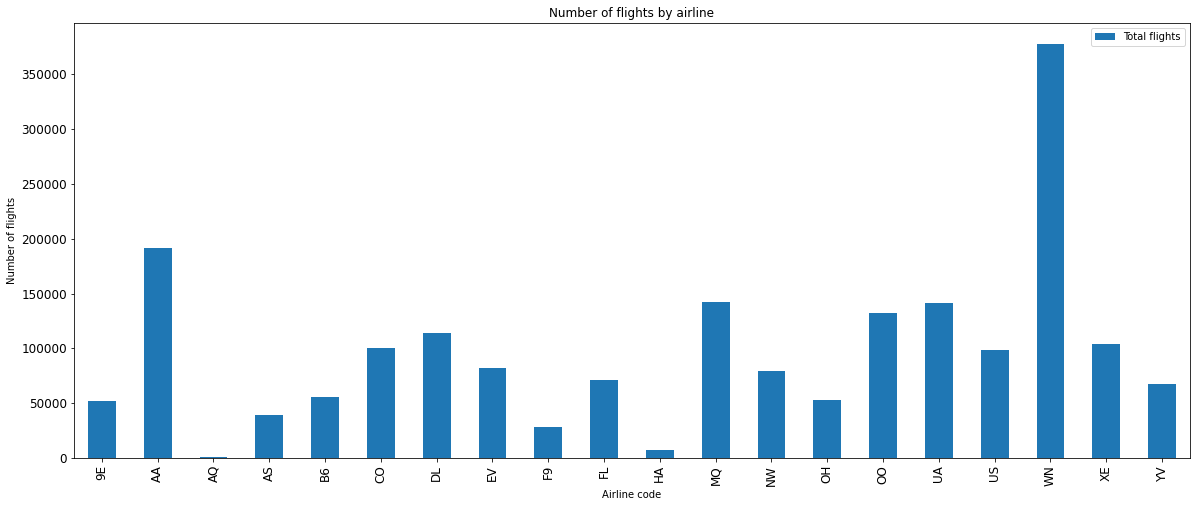

In [48]:
#second option - creating a dataframe first and than diagram
data = df.groupby('UniqueCarrier')['UniqueCarrier'].count()
new_df = pd.Series(data, name='Total flights')
new_df.to_frame()
new_df = new_df.reset_index()
new_df

new_df.plot.bar(x="UniqueCarrier", xlabel="Airline code",
                y="Total flights", ylabel="Number of flights",
                rot=90, title="Number of flights by airline",
                figsize=(20, 8), fontsize=12,)

plt.savefig('fig1.png')
plt.show()

The airline code WN is operating the most flights.

####Execise 1 - One numeric value - ArrDelay

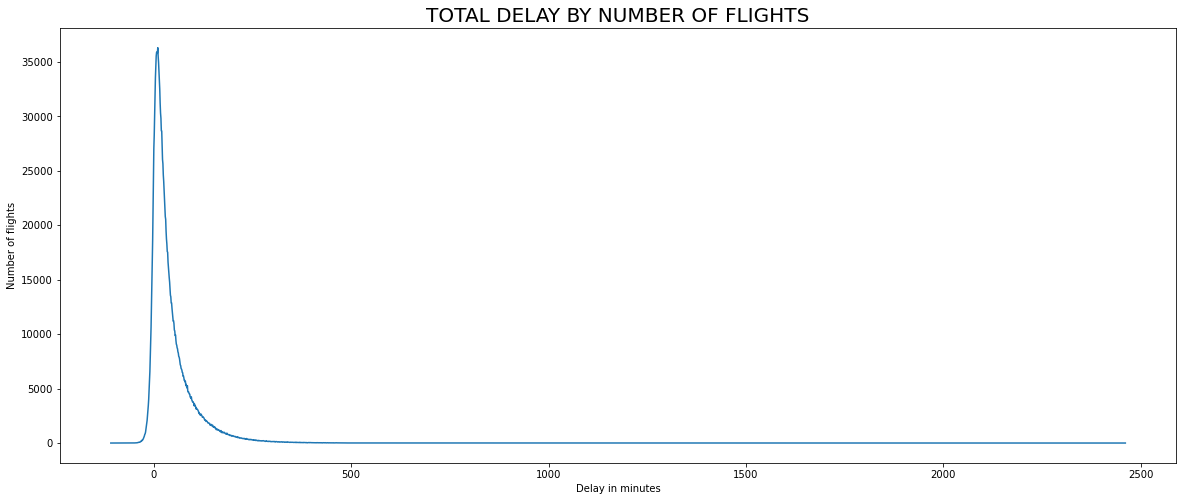

Total number of flights on time is: 27040


In [145]:
data2 = df['ArrDelay'].value_counts()

plt.figure(figsize =(20, 8))
sns.lineplot(x=data2.index, y=data2.values)
plt.title('TOTAL DELAY BY NUMBER OF FLIGHTS', fontsize=20)
plt.xlabel('Delay in minutes')
plt.ylabel('Number of flights')

plt.savefig('fig2.png')
plt.show()
x = data2[0]
print('Total number of flights on time is:',x)

####One numerical and one categoric value - ArrDelay + UniqueCarrier

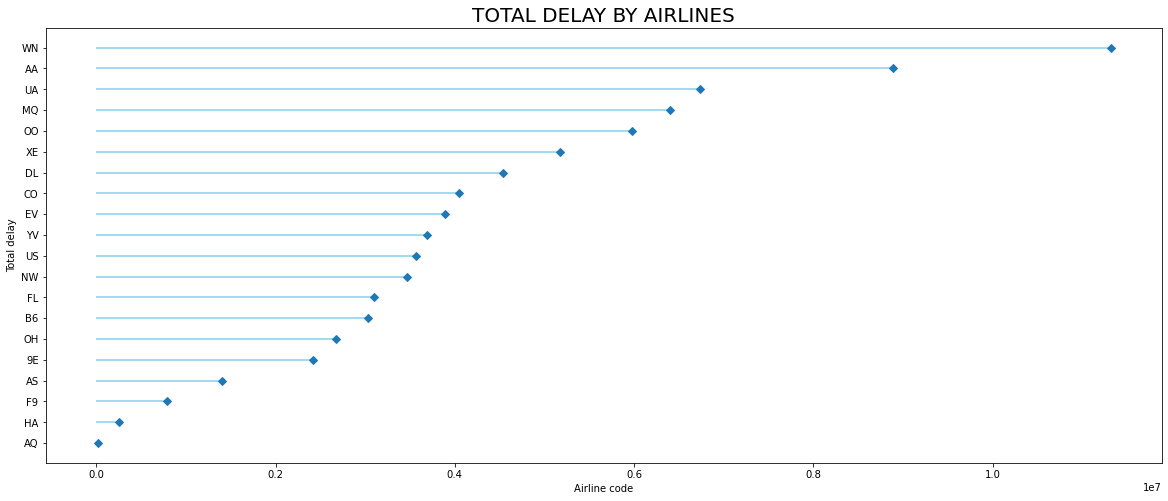

In [146]:
data3 = df.groupby('UniqueCarrier')[['ArrDelay']].sum()
data3 = data3.reset_index()
ordered_df = data3.sort_values(by='ArrDelay')

my_range=range(1,len(data3.index)+1)
plt.figure(figsize =(20, 8))

plt.hlines(y=my_range, xmin=0, xmax=ordered_df['ArrDelay'], color='skyblue')
plt.plot(ordered_df['ArrDelay'], my_range, "D")
plt.yticks(my_range, ordered_df['UniqueCarrier'])

plt.title('TOTAL DELAY BY AIRLINES', fontsize=20)
plt.xlabel('Airline code')
plt.ylabel('Total delay')

plt.savefig('fig3.png')
plt.show()

In [48]:
maxValue = (ordered_df['ArrDelay'].max())/(60*60)#In original dataset the units of time are not specified, I assume that it would be in seconds.
maxValue = round(maxValue)
print('The accumulated time of airline code WN is',maxValue, 'hours. This is the highest delay total time.')

The accumulated time of airline code WN is 3144 hours. This is the highest delay total time.


####Two numeric values - ArrDelay + DepDelay

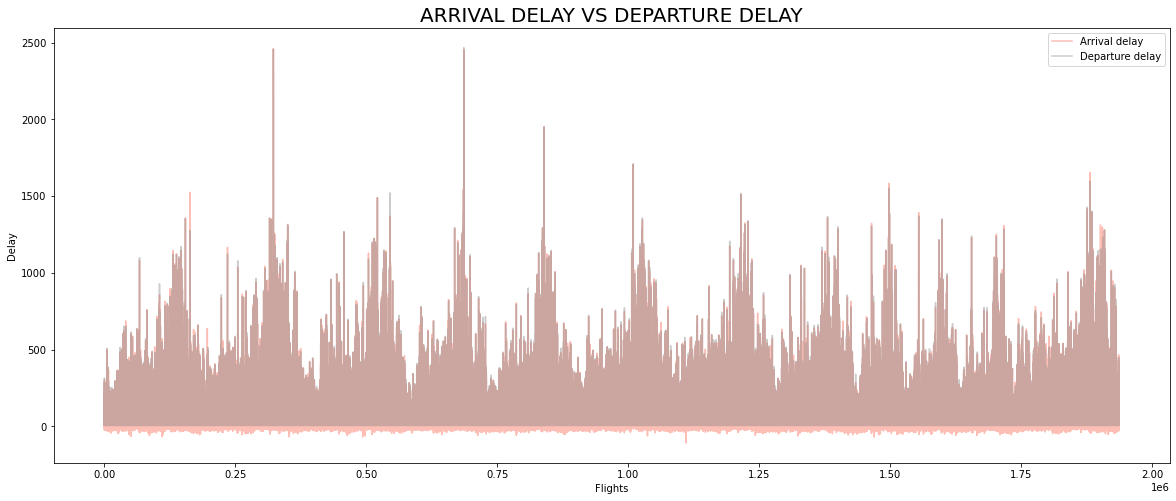

In [148]:
my_df = df[['ArrDelay','DepDelay']]
new_df = my_df.dropna()
plt.figure(figsize =(20, 8))

y1 = new_df['ArrDelay']
y2 = new_df['DepDelay']

plt.plot(y1,color='#fdbfb5')
plt.plot(y2, color='#808080', alpha=0.4)
plt.title("ARRIVAL DELAY VS DEPARTURE DELAY",fontsize=20)
plt.xlabel("Flights")
plt.ylabel("Delay")
plt.legend(['Arrival delay', 'Departure delay']);

plt.show(close=None, block=None)

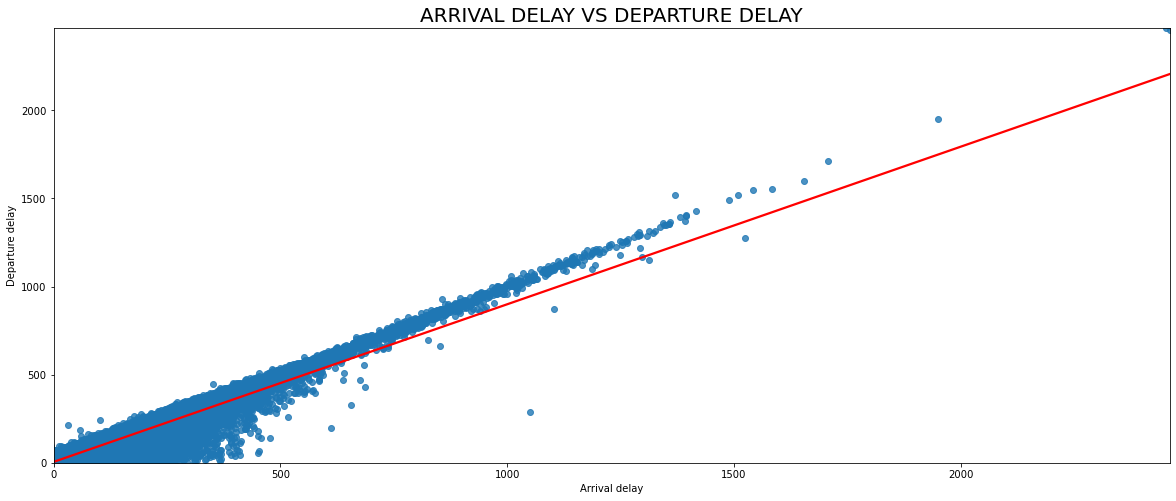

In [149]:
plt.figure(figsize =(20, 8))
sns.regplot(data=new_df, x=new_df['ArrDelay'], y=new_df['DepDelay'], fit_reg=True, line_kws=dict(color="red"))
plt.title("ARRIVAL DELAY VS DEPARTURE DELAY",fontsize=20)
plt.xlabel("Arrival delay")
plt.ylabel("Departure delay")
plt.xlim(0, df['ArrDelay'].max())
plt.ylim(0, df['DepDelay'].max())

plt.savefig('fig4.png')
plt.show()

There is a strong relation between departure delay and arrival delay.

In [55]:
np.corrcoef([new_df['DepDelay'],new_df['ArrDelay']])[0,1]#to check if the interpretation is correct

0.9529266852026743

####Three variables - ArrDelay + DepDelay + UniqueCarrier

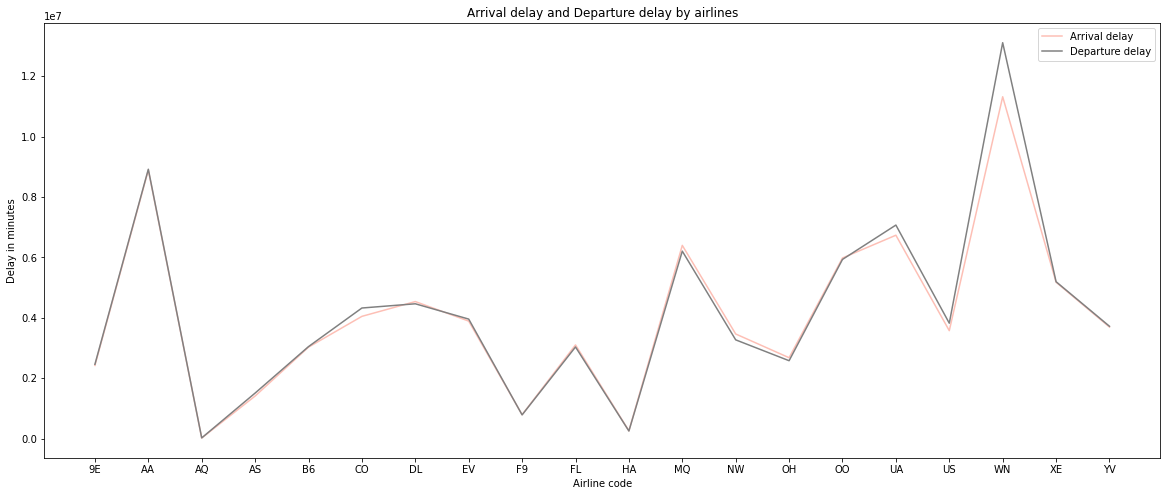

In [150]:
var = df[['ArrDelay','DepDelay','UniqueCarrier']]

new_df = var.groupby([('UniqueCarrier')])[['ArrDelay','DepDelay' ]].sum()
new_df = new_df.reset_index()
new_df

y1 = new_df['ArrDelay']
y2 = new_df['DepDelay']
y3 = new_df['UniqueCarrier']
fig, ax = plt.subplots(figsize=(20, 8))

plt.plot(y3, y1,color='#fdbfb5')
plt.plot(y3, y2, color='#808080')
plt.title("Arrival delay and Departure delay by airlines")
plt.xlabel("Airline code")
plt.ylabel("Delay in minutes")
plt.legend(['Arrival delay', 'Departure delay']);

plt.savefig('fig5.png')
plt.show(close=None, block=None)

Interpretation:All airlines has strong relation between arrivaldelay and departure delay. Only Airoline code WN has much more higher departure delay than arrival delay.

####Four variables - ArrDelay + DepDelay + UniqueCarrier + AirTime

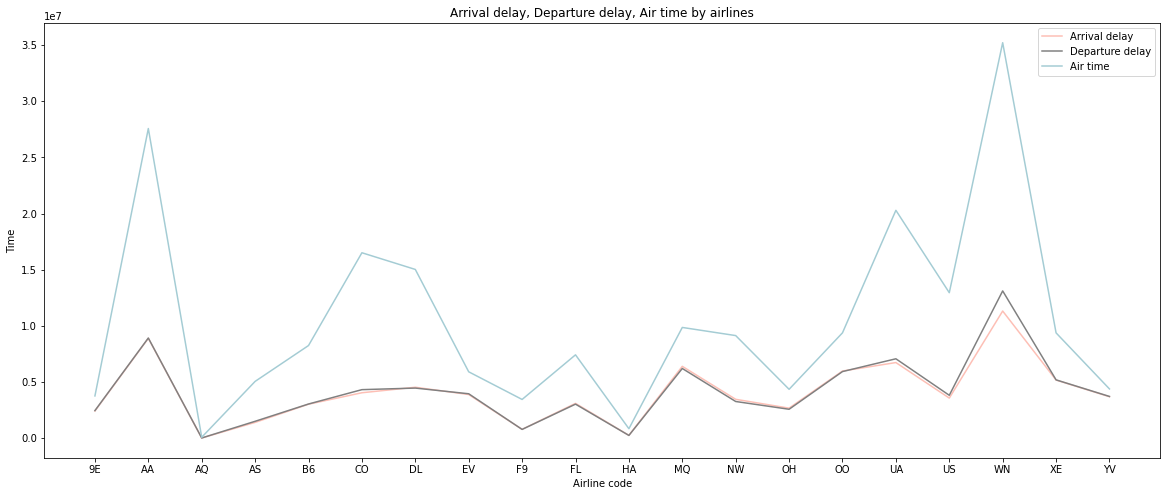

In [151]:
var = df[['ArrDelay','DepDelay','UniqueCarrier','AirTime']]
new_df = my_df.dropna()
new_df = var.groupby([('UniqueCarrier')])[['ArrDelay','DepDelay', 'AirTime']].sum()
new_df = new_df.reset_index()

y1 = new_df['ArrDelay']
y2 = new_df['DepDelay']
y3 = new_df['AirTime']
y4 = new_df['UniqueCarrier']
fig, ax = plt.subplots(figsize=(20, 8))

plt.plot(y4, y1,color='#fdbfb5')
plt.plot(y4, y2, color='#808080')
plt.plot(y4, y3, color='#a4ccd4')
plt.title("Arrival delay, Departure delay, Air time by airlines")
plt.xlabel("Airline code")
plt.ylabel("Time")
plt.legend(['Arrival delay', 'Departure delay', 'Air time']);

plt.savefig('fig6.png')
plt.show(close=None, block=None)

###Execise 2 - Export diagrams to HTML

In [182]:
#first option
#plt.savefig('fig6.png')

#second option
#mpld3.save_html(fig, 'fig6.html')

###Execise 3 - Integration to Sprint3_T05

In [ ]:
#from IPython import display
#display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig1.png")